In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#load the data csv file 
df = pd.read_csv('matched_train_imputed_df.csv', header=0, index_col=0)

In [5]:
# get all column names
col_names = df.columns

print(col_names)

Index(['Unnamed: 0.1', 'income.0.0', 'days_per_week_walk.0.0',
       'diabetes..0.0_x', 'smoke_status.0.0', 'bmi.0.0', 'Age_recr.0.0',
       'total_cholesterol.0.0', 'vldl_cholesterol.0.0', 'ldl_cholesterol.0.0',
       'hdl_cholesterol.0.0', 'glucose.0.0', 'c_reactive_protein.0.0',
       'HbA1c.0.0', 'insulin_IGF_1.0.0', 'lipoprotein.0.0', 'phosphate.0.0',
       'SHBG.0.0', 'total_bilirubin.0.0', 'testosterone.0.0',
       'triglycerides.0.0', 'alcohol_consumption.0.0', 'Unnamed: 0', 'eid',
       'diabetes..0.0_y'],
      dtype='object')


In [6]:
### drop out the columns that are not needed 
cols_to_drop=['Unnamed: 0.1','income.0.0', 'X', 'days_per_week_walk.0.0',
              'diabetes..0.0_x', 'smoke_status.0.0', 'bmi.0.0',
            'Age_recr.0.0', 'alcohol_consumption.0.0', 'Unnamed: 0','eid',
              'diabetes..0.0_y']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [7]:
# Scaling the biomarkers
scaler = StandardScaler()
df_standardized=scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized, columns = df.columns)
df_standardized.to_csv('standardized_test_matched_imp.csv')
print(df_standardized.head())

   total_cholesterol.0.0  vldl_cholesterol.0.0  ldl_cholesterol.0.0  \
0              -0.302019              0.230326            -1.532723   
1               1.249284              0.230326             0.618467   
2              -0.302019              0.230326            -1.532723   
3              -0.302019              0.230326            -1.532723   
4              -0.302019              0.230326             0.618467   

   hdl_cholesterol.0.0  glucose.0.0  c_reactive_protein.0.0  HbA1c.0.0  \
0            -0.115324    -0.614236               -0.259522   1.242641   
1            -0.115324    -0.614236               -0.259522   1.450170   
2            -0.115324     1.936776               -0.065123   1.761462   
3            -0.115324     1.936776               -0.259522   0.101235   
4            -0.115324     0.661270                1.490063   0.101235   

   insulin_IGF_1.0.0  lipoprotein.0.0  phosphate.0.0  SHBG.0.0  \
0          -0.599506        -0.881055      -0.088736  1.247163

/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

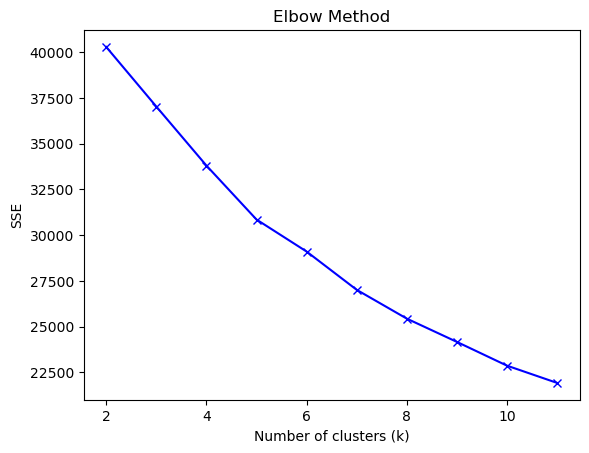

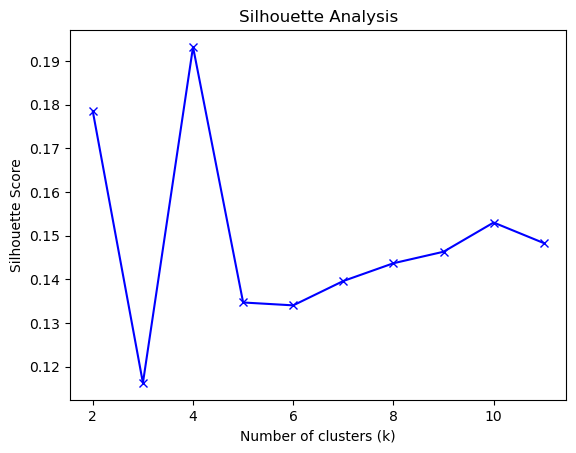

The optimal number of clusters is 4


/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


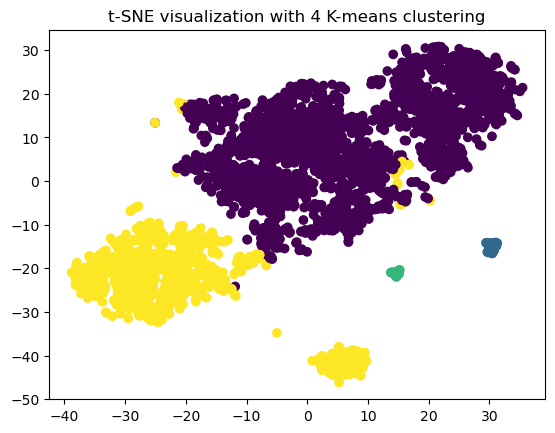

The silhouetter score with 2 clusters is 0.17844408391534908
The silhouetter score with 3 clusters is 0.11625473978745554
The silhouetter score with 4 clusters is 0.19322286978911926
The silhouetter score with 5 clusters is 0.13468020407867806
The silhouetter score with 6 clusters is 0.1340216113713139
The silhouetter score with 7 clusters is 0.1396034476171497
The silhouetter score with 8 clusters is 0.1436708131508793
The silhouetter score with 9 clusters is 0.1463045039860603
The silhouetter score with 10 clusters is 0.15299628282868327
The silhouetter score with 11 clusters is 0.14829672575311797


/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


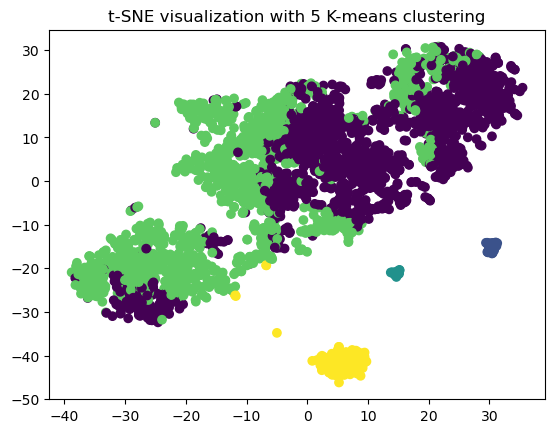

/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


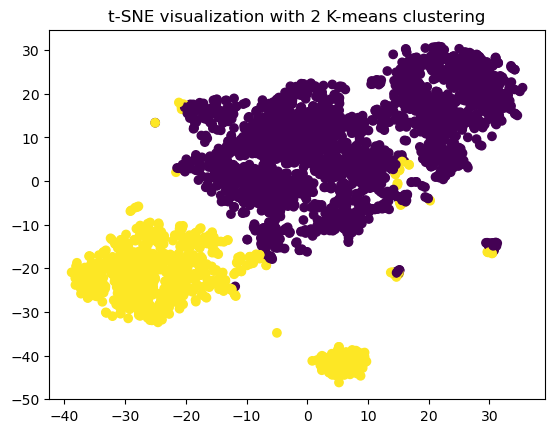

In [9]:
## KMEANS
# Define a range of number of clusters to test
k_range = range(2, 12)

# Initialize empty lists to store the SSE and silhouette scores
sse = []
silhouette_scores = []

# Fit KMeans for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_standardized, kmeans.labels_))

# Plot the elbow curve
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Find the optimal number of clusters based on the highest silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is {optimal_k}")

### KMEANS TSNE 4
# df_standardized is the high-dimensional data
tsne = TSNE(n_components=2, perplexity=80, random_state=42)
X_tsne = tsne.fit_transform(df_standardized)

# Cluster the transformed data using K-means, use elbow method and silhouette to determine the optimal number of clusters 
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(df_standardized)

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with 4 K-means clustering")
plt.show()
for k in k_range:
    print(f'The silhouetter score with {k} clusters is {silhouette_scores[k-2]}')

### KMEANS TSNE 5
# df_standardized is the high-dimensional data
tsne = TSNE(n_components=2, perplexity=80, random_state=42)
X_tsne = tsne.fit_transform(df_standardized)

# Cluster the transformed data using K-means, use elbow method and silhouette to determine the optimal number of clusters 
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(df_standardized)

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with 5 K-means clustering")
plt.show()

### KMEANS TSNE 2
# df_standardized is the high-dimensional data
tsne = TSNE(n_components=2, perplexity=80, random_state=42)
X_tsne = tsne.fit_transform(df_standardized)

# Cluster the transformed data using K-means, use elbow method and silhouette to determine the optimal number of clusters 
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(df_standardized)

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with 2 K-means clustering")
plt.show()

In [11]:
for k in [4,5,2]:
    kmeans_train_df=df_standardized.copy()
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized)
    for df in [kmeans_train_df]:
        labels = kmeans.predict(df)
        print(set(labels))
        df['cluster_kmeans'] = labels
        if df is kmeans_train_df:
            df.to_csv(f'Train {k}Kmeans.csv', index=False)  
        else:
            df.to_csv(f'Test {k}Kmeans.csv', index=False) 

/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{0, 1, 2, 3}
{0, 1, 2, 3, 4}
{0, 1}


/rds/general/user/hg1222/home/anaconda3/envs/test1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


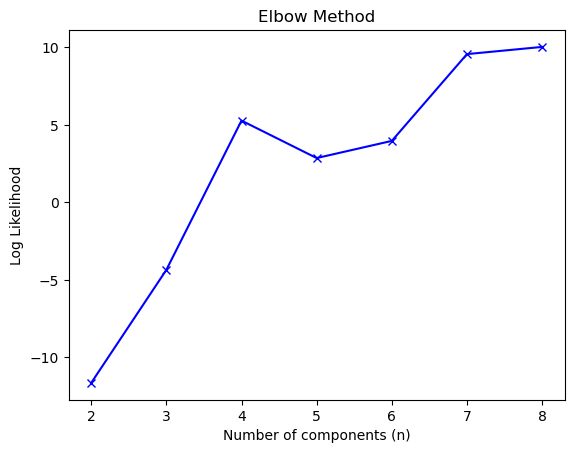

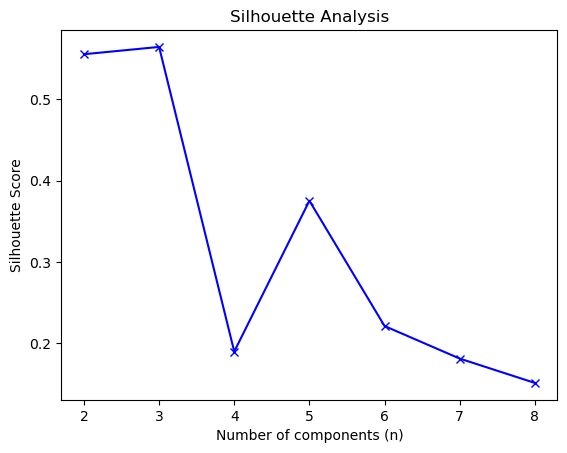

The optimal number of clusters is 3


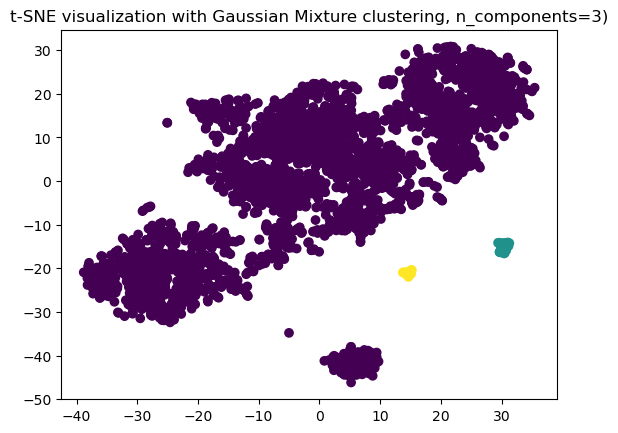

The silhouetter score with 2 components is 0.5552598435762784
The silhouetter score with 3 components is 0.5642308092957554
The silhouetter score with 4 components is 0.18994309152946523
The silhouetter score with 5 components is 0.37522951227349943
The silhouetter score with 6 components is 0.22131520920258152
The silhouetter score with 7 components is 0.1813114424391161
The silhouetter score with 8 components is 0.15140622283786787


In [13]:
## GAUSSIAN MIXTURE
# Define a range of number of clusters to test
n_component_range = range(2, 9)

# Initialize empty lists to store the SSE and silhouette scores
log_lik = []
silhouette_scores = []

# Fit KMeans for each value of k
for n in n_component_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_standardized)
    log_lik.append(gmm.score(df_standardized))
    silhouette_scores.append(np.mean(silhouette_samples(df_standardized, gmm.predict(df_standardized)))
)

# Plot the elbow curve
plt.plot(n_component_range, log_lik, 'bx-')
plt.xlabel('Number of components (n)')
plt.ylabel('Log Likelihood')
plt.title('Elbow Method')
plt.show()

# Plot the silhouette scores
plt.plot(n_component_range, silhouette_scores, 'bx-')
plt.xlabel('Number of components (n)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Find the optimal number of clusters based on the highest silhouette score
optimal_n = n_component_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is {optimal_n}")

# Cluster the transformed data using Gaussian Mixture
gmm = GaussianMixture(n_components=optimal_n, random_state=42)
labels = gmm.fit_predict(df_standardized)

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with Gaussian Mixture clustering, n_components={optimal_n})")
plt.show()
for n in n_component_range:
    print(f'The silhouetter score with {n} components is {silhouette_scores[n-2]}')


In [15]:
for n in [2,3]:
    gaus_train_df=df_standardized.copy()
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_standardized)
    for df in [gaus_train_df]:
        labels = gmm.predict(df)
        print(set(labels))
        df['cluster_ncomponents'] = labels
        if df is gaus_train_df:
            df.to_csv(f'Train {n}GMM.csv', index=False)  
        else:
            df.to_csv(f'Test {n}GMM.csv', index=False)  

{0, 1}
{0, 1, 2}


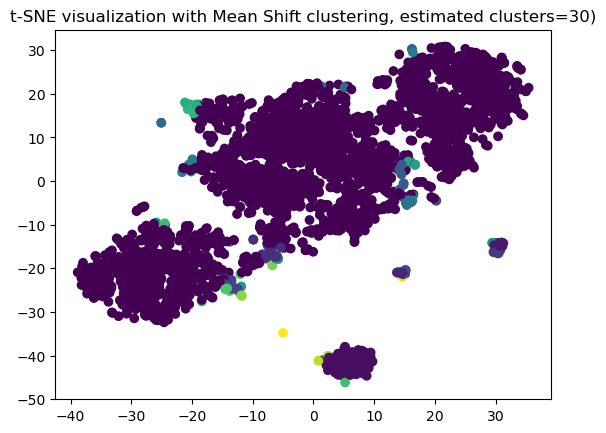

In [12]:
### MEAN SHIFT

# Estimate the bandwidth parameter for Mean Shift
bandwidth = estimate_bandwidth(df_standardized, quantile=0.2, n_samples=500)

# Cluster the transformed data using Mean Shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels = ms.fit_predict(df_standardized)
n_clusters_ = len(np.unique(labels))

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with Mean Shift clustering, estimated clusters={n_clusters_})")
plt.show() # MEAN SHIFT PRODUCES BAD CLUSTERS WHATEVER BANDWIDTH IS CHOSEN